# Sentiment Analysis

Sentiment Analysis is a Natural Language Processing (NLP) technique that helps a computer understand human emotions or opinions expressed in text (like reviews, tweets, feedback, etc.).

#### Types:
Positive Sentiment : Expresses happiness, satisfaction, praise, or approval.

Negative Sentiment: Expresses dislike, criticism, disappointment, or anger.

Neutral Sentiment: Neither positive nor negative, often factual or balanced.

## Rule based analysis

In [1]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

### TextBlob

In [2]:
from textblob import TextBlob

In [3]:
print(sentence_1)

sentiment_score_1 = TextBlob(sentence_1)

print("Polarity: ", sentiment_score_1.sentiment.polarity) 

# polarity > 0 : positive sentiment
# polarity < 0 : negative sentiment
# polarity = 0 : neutral sentiment

i had a great time at the movie it was really funny
Polarity:  0.525


In [4]:
print(sentence_2)

sentiment_score_2 = TextBlob(sentence_2)

print("Polarity: ", sentiment_score_2.sentiment.polarity)

i had a great time at the movie but the parking was terrible
Polarity:  -0.09999999999999998


In [5]:
print(sentence_3)

sentiment_score_3 = TextBlob(sentence_3)

print("Polarity: ", sentiment_score_3.sentiment.polarity)

i had a great time at the movie but the parking wasn't great
Polarity:  0.8


In [6]:
print(sentence_4)

sentiment_score_4 = TextBlob(sentence_4)

print("Polarity: ", sentiment_score_4.sentiment.polarity)

i went to see a movie
Polarity:  0.0


### VADER

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [8]:
vader_sentiment = SentimentIntensityAnalyzer()

In [9]:
print(sentence_1)

vader_sentiment_score_1 = vader_sentiment.polarity_scores(sentence_1)

print("Polarity: ", vader_sentiment_score_1) 

i had a great time at the movie it was really funny
Polarity:  {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


In [10]:
print(sentence_2)

vader_sentiment_score_2 = vader_sentiment.polarity_scores(sentence_2)

print("Polarity: ", vader_sentiment_score_2) 

i had a great time at the movie but the parking was terrible
Polarity:  {'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}


In [11]:
print(sentence_3)

vader_sentiment_score_3 = vader_sentiment.polarity_scores(sentence_3)

print("Polarity: ", vader_sentiment_score_3) 

i had a great time at the movie but the parking wasn't great
Polarity:  {'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}


In [12]:
print(sentence_4)

vader_sentiment_score_4 = vader_sentiment.polarity_scores(sentence_4)

print("Polarity: ", vader_sentiment_score_4) 

i went to see a movie
Polarity:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Pre-Trained transformer

In [ ]:
import transformers
from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [ ]:
print(sentence_1)
sentiment_pipeline(sentence_1)

In [ ]:
print(sentence_2)
sentiment_pipeline(sentence_2)

In [ ]:
print(sentence_4)
sentiment_pipeline(sentence_4)

In [ ]:
specific_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
print(sentence_1)
specific_model(sentence_1)

In [ ]:
print(sentence_4)
specific_model(sentence_4)

## Practical task

In [42]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import chain
from nltk import NaiveBayesClassifier

In [ ]:
data = pd.read_csv(r"D:\AI-ML\NLP\CSV files\book_reviews_sample.csv") # the data should be in the same folder as your notebook
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [47]:
# lowercase
data['reviewText_clean'] = data['reviewText'].str.lower()

# remove punctuation
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['reviewText_clean']), axis=1)

data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [52]:
# Rule-based sentiment with VADER

vader_sentiment = SentimentIntensityAnalyzer()

data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

<Axes: xlabel='vader_sentiment_label'>

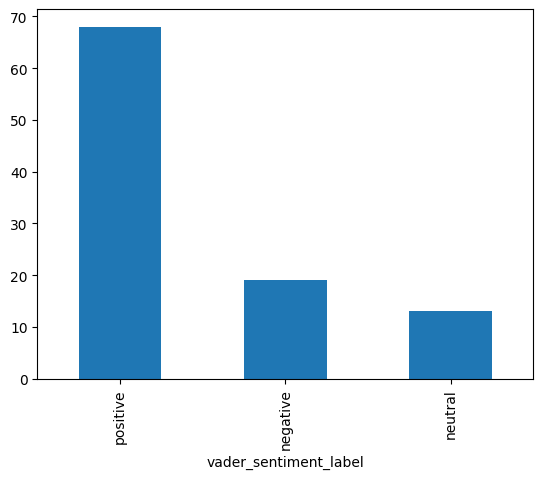

In [60]:
# create labels
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

data['vader_sentiment_label'].value_counts().plot.bar()

In [ ]:
# Pre-trained Transformer Model
transformer_pipeline = pipeline("sentiment-analysis")

In [ ]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    
data['transformer_sentiment_label'] = transformer_labels

data['transformer_sentiment_label'].value_counts().plot.bar()